In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [18]:
df = pd.read_csv("input/tasks.csv")
date_format = "%Y-%m-%d"
df["Start day"] = pd.to_datetime(df["Start day"], format=date_format)
df["End day"] = pd.to_datetime(df["End day"], format=date_format)

In [19]:
df

,Name,Start day,End day,Work
0,p2.e,2024-11-21,2024-12-04,10
1,p2.m,2024-12-05,2025-04-02,170
2,p2.f,2025-04-03,2025-04-30,60
3,p3.e,2024-12-01,2024-12-13,4
4,p3.m,2024-12-14,2025-05-30,112
5,p3.f,2025-05-31,2025-06-27,24
6,p4.e,2024-12-16,2025-01-03,15
7,p4.m,2025-01-04,2025-06-20,240
8,p4.f,2025-06-21,2025-07-18,40
9,p5.e,2024-12-31,2025-01-13,16


In [20]:
df.dtypes

Name                 object
Start day    datetime64[ns]
End day      datetime64[ns]
Work                  int64
dtype: object

In [26]:
duration = (df["End day"] - df["Start day"])

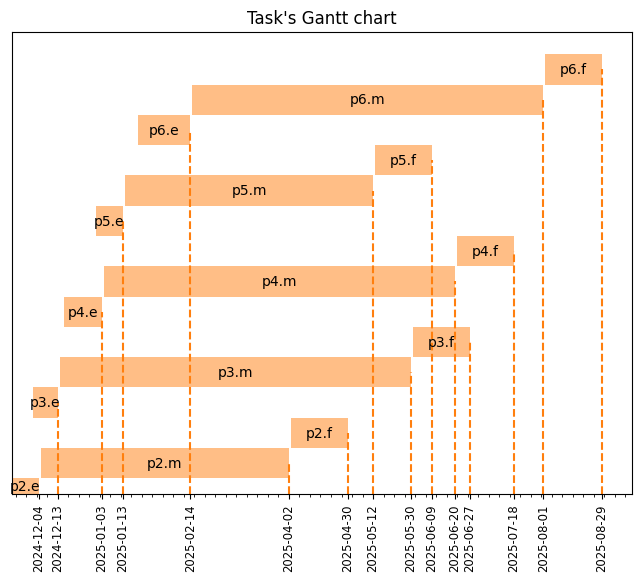

In [45]:
fig, ax = plt.subplots()
rects = plt.barh(y=df["Name"], width=duration, left=df["Start day"], color='tab:orange', height=1.0, alpha=0.5)
ax.bar_label(rects, labels=df["Name"], label_type='center')
ax.vlines(df["End day"], 0, df["Name"], linestyles='dashed', color="tab:orange")
ax.xaxis_date()
# ax.set_xlabel('Day')
ax.set_title("Task's Gantt chart")
ax.yaxis.set_major_locator(tck.NullLocator())
ax.xaxis.set_minor_locator(tck.MultipleLocator(5))
ax.set_xticks(df["End day"])
ax.tick_params(axis='x', rotation=90, labelsize='small')
ax.yaxis.set_tick_params(labelleft=False)
ax.set_ylim(bottom=0)
fig.set_size_inches(8, 6)
plt.savefig("output/gantt-chart.png", bbox_inches="tight", dpi = 200)
# plt.close()